In [87]:
from sympy import *
import numpy as np

In [88]:
R_25 = 10000 #Ω
beta = 3455 #K
temp_ref = 25 + 273.15 #K
R_read = 1000 #Ω
V_ref = 3.3 #V
adc_resolution = 4096

T = symbols('T', real=True) #temperature in K

R_ntc = R_25 * exp(beta * (1/temp - 1/temp_ref))
V_read = V_ref * R_read / (R_read + R_ntc)
adc_read = V_read/V_ref * adc_resolution

adc_read

4096000.0/(0.0927556734730098*exp(3455/T) + 1000)

In [89]:
a = symbols("a", real=True)
eq = Eq(adc_read, a)
T_a = solveset(eq, T, domain=S.Reals).args[1].args[0] #K
T_a = T_a - 273.15 #convert to celcius
display(eq, Eq(T, T_a))

Eq(4096000.0/(0.0927556734730098*exp(3455/T) + 1000), a)

Eq(T, -273.15 + 3455/log(-10781.011689716 + 44159023.8810768/a))

// assumes 10kΩ β=3455 NTC with 1kΩ low side resistor, Vref=3.3 and 12-bit ADC
// find temperature using index i=(adc_val-121)>>5
static const uint8_t ntc_lut[] = {
    0,
    5,
    9,
    13,
    16,
    19,
    22,
    24,
    27,
    29,
    31,
    33,
    35,
    37,
    39,
    41,
    42,
    44,
    46,
    47,
    49,
    50,
    52,
    53,
    54,
    56,
    57,
    59,
    60,
    61,
    63,
    64,
    65,
    66,
    68,
    69,
    70,
    71,
    73,
    74,
    75,
    76,
    77,
    79,
    80,
    81,
    82,
    83,
    85,
    86,
    87,
    88,
    89,
    91,
    92,
    93,
    94,
    96,
    97,
    98,
    99,
    101,
    102,
    103,
    104,
    106,
    107,
    108,
    110,
    111,
    112,
    114,
    115,
    117,
    118,
    120,
    121,
    123,
    124,
    126,
    127,
    129,
    131,
    132,
    134,
    136,
    138,
    139,
    141,
    143,
    145,
    147,
    149,
    152,
    154,
    156,
    159,
    161,
    164,
    167,

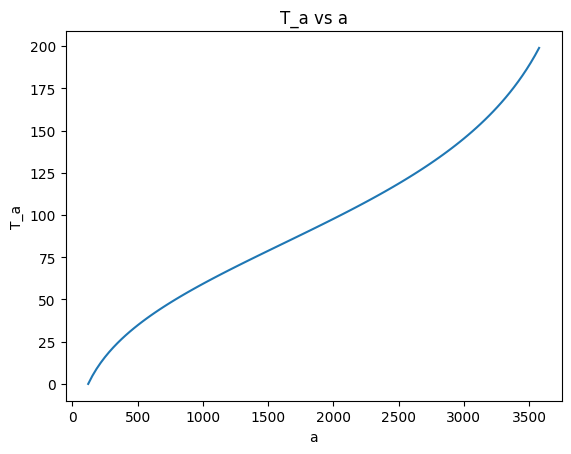

In [106]:
import matplotlib.pyplot as plt

adc_step = 1<<5 #32

a_values = range(121, 3578, adc_step) #range from 0-200 ºC
T_values = []

# print("i, adcfloor, adcmean, temp")

print(f"// assumes 10kΩ β=3455 NTC with 1kΩ low side resistor, Vref=3.3 and 12-bit ADC")
print(f"// find temperature using index i=(adc_val-{a_values[0]})>>{floor(np.log2(adc_step))}")
print("static const uint8_t ntc_lut[] = {")
for i in range(len(a_values)):
    a_val = a_values[i]
    T_val = T_a.subs({a: a_val + adc_step/2 })
    T_values.append(T_val)
    # print(f"{i}: {a_val}, {a_val+adc_step//2}, {round(T_val)}")
    print(f"    {round(T_val)},")
print("};")



plt.figure()
plt.plot(a_values, T_values)
plt.xlabel('a')
plt.ylabel('T_a')
plt.title('T_a vs a')
plt.show()
